# Abstract:

La pandemia de COVID-19 vino a romper los esquemas y nos llevó a cuestionar nuestra visión en una gran cantidad de aspectos, entre ellas, la forma en que nos alimentamos. De repente, la idea de consumir alimentos ultraprocesados o monocultivos como la soja transgénica pareció el "apocalipsis" y la búsqueda de los productos orgánicos y agroecológicos, nuestra "luz al final del tunel".

Las grandes cadenas de supermercados han identificado esta nueva necesidad y han intentado actuar acorde a ello, pero, ¿han logrado "convencer" al público de que venden productos más sanos? ¿en qué se diferencian estos nuevos clientes de los anteriores? ¿ es posible aumentar la ganancia de las tiendas a costa de productos más caros y sofisticados?







**Definición de objetivos:**
1.   Se quiere comprobar si es posible hacer una caracterización del perfil de los compradores con el fin de segmentar la cartera de una forma más adecuada e implementar alguna acción concreta que resulte en un mayor revenue para la empresa.
2.   Adicionalmente, se quiere analizar si el programa de fidelidad de clientes tiene impacto en los ingresos de la empresa y, en caso afirmativo, si es posible hacer una estimación del mismo a futuro.


---



**Contexto comercial:**

La forma en que nos alimentamos cobra cada día más relevancia. El rechazo a los productos ultraprocesados y la vuelta a "lo natural" es cada vez más notorio. Las sociedades modernas, al tiempo que buscan mejorar su alimentación, intentan simplificar los procesos de compra con el objeto de centralizar todo en un solo lugar. 

Históricamente, los productos orgánicos fueron vendidos en dietéticas y tiendas naturistas, siempre estuvieron por fuera del surtido de productos de las grandes cadenas puesto que sus precios siempre fueron más elevados que los de los FMCG. Al estar hoy en el foco de atención, los detallistas tienen la oportunidad de explotar dicho nicho de productos, buscando la manera de dar respuesta a esta nueva demanda sin asumir pérdidas en el intento.


---


**Problema comercial:**
Los productos orgánicos poseen precios más elevados que los demás puesto que su fabricación se hace en menor escala y con controles mucho más estrictos. Las grandes cadenas se dedican principalmente a comercializar productos de precios intermedios-bajos, por lo que, la venta de productos orgánicos, resulta difícil. A raíz de todo esto, vienen a la mente las siguientes cuestiones:


> ¿Cómo **atraer** a los consumidores de productos orgánicos?


> ¿Cómo **aumentar** ese número de consumidores? 


> ¿Cómo **identificar** potenciales consumidores?


---

**Contexto Analítico:**

Se utilizará una base de datos proveniente de una cadena de supermercados de Reino Unido que ha decidido poner a la venta una nueva linea de productos orgánicos y, para incentivar su compra, ha brindado cupones de descuento para productos orgánicos a los clientes que participan en los programas de fidelidad. 
La base incluye información de edad, ubicación geográfica, género, nivel de afiliación al programa de beneficios, nivel de gasto en el supermercado y un indicador respecto a la compra o no de productos orgánicos, para un listado de alrededor de 20.000 clientes.

Se desconoce el nombre del detallista que ha implementado dicha medida, sin embargo, la base de datos utilizada puede encontrarse en el siguiente link de Kaggle:  https://www.kaggle.com/datasets/papercool/organics-purchase-indicator?select=organics.csv

---

**Recomendaciones:**
* Continuar con los descuentos de acuerdo al nivel de fidelidad
* Implementar descuentos por edades para aquellos clientes que no forman parte del programa de fidelidad. Ejemplo: descuentos para jóvenes, descuentos para jubilados, etc.
* Informar a los clientes sobre los beneficios del consumo de este tipo de productos para la salud. 
---

 **Diccionario de variables:**


*   **cust_loy_id**: *numero identificatorio del programa de fidelidad del cliente*
*   **Gender**: *género del cliente*
*   **geographic_region**: *región geográfica donde hace sus compras el cliente*
*   **loyalty_status**: *nivel de status del cliente de acuerdo al programa de lealtad*
*   **Neigborhood Cluster-55 Level**: *grupo vecindario al que pertenece el cliente*
*   **Neighborhood Cluster-7 Level**: *tipo de barrio al que pertenece el cliente*
*   **Television Region**: *región televisiva a la que pertenece el cliente*
*   **Affluence Grade**: *grado de afluencia del cliente*
*   **Age**: *edad del cliente*
*   **Loyalty Card Tenure**: *tiempo transcurrido como miembro del programa de fidelidad de cada cliente*
*   **Organics Purchase Count**: *numero de productos orgánicos comprados por cada cliente*
*   **organic_purch_indic**: *indica si el cliente compró (1) o no (0) productos orgánicos*
*   **total_spend**: *monto total gastado por el cliente*






---


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from   scipy import stats
import numpy  as np
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn import cluster
from sklearn.decomposition import PCA
#from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
df_organics= pd.read_csv('organics.csv',sep=',')
df_organics= df_organics.rename(columns={'Loyalty Status': "loyalty_status",'Customer Loyalty ID':'cust_loy_id','Total Spend':'total_spend','Organics Purchase Indicator':'organic_purch_indic','Geographic Region':'geographic_region','Neigborhood Cluster-55 Level':'Neigh_clust_55_lvl','Neighborhood Cluster-7 Level':'Neigh_clust_7_lvl','Television Region':'tv_region'})
df_organics
#df_organics.describe(include=[object]).T
#df_organics.info()

,cust_loy_id,Gender,geographic_region,loyalty_status,Neigh_clust_55_lvl,Neigh_clust_7_lvl,tv_region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,organic_purch_indic,total_spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,F,South East,Silver,9.0,B,London,13,65,1,0.00%,5,0,0,1500.00
22219,52834376,U,South East,Gold,34.0,D,S & S East,15,73,1,0.00%,12,0,0,6053.06
22220,52837057,F,North,Gold,15.0,B,Yorkshire,9,70,1,0.00%,5,0,0,6000.00
22221,52838096,F,North,Silver,8.0,B,N West,11,66,1,0.00%,5,0,0,5000.00


In [ ]:
df_organics_loyalty=df_organics[['cust_loy_id','loyalty_status']].groupby(by='loyalty_status').count()
df_organics_loyalty

,cust_loy_id
loyalty_status,
Gold,6324
Platinum,840
Silver,8572
Tin,6487


In [ ]:
df_organics_loyalty.index

Index(['Gold', 'Platinum', 'Silver', 'Tin'], dtype='object', name='loyalty_status')



---


**Exploración de los datos (EDA):**

*Análisis sobre la **composición de la cartera** de clientes*
 


> **Afiliación**





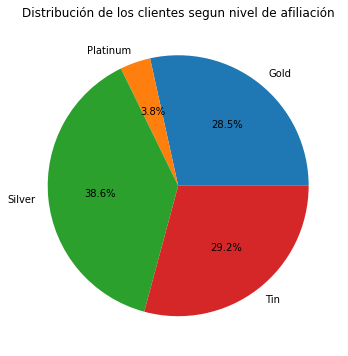

In [ ]:
# Piechart de la composición del total de clientes de acuerdo a su grado de afiliación. 
plt.figure(figsize=(10,6))
plt.pie(df_organics_loyalty.cust_loy_id, labels = df_organics_loyalty.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación')
plt.show()

*   El mayor porcentaje corresponde a Silver, seguido por Tin y Gold en porcentajes similares.
*   Platinum representa el menor porcentaje de clientes, pero, como se verá más adelante, es el segmento que presenta un mayor nivel de gasto, propiciado por el hecho de que es el status que más beneficios recibe.

> **Región**




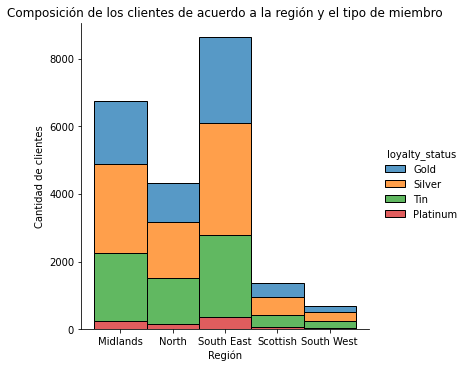

In [ ]:
# Composición de cada región de acuerdo al tipo de miembro
sns.displot(data=df_organics, x="geographic_region", hue="loyalty_status", multiple="stack")
plt.title('Composición de los clientes de acuerdo a la región y el tipo de miembro')
plt.xlabel('Región')
plt.ylabel('Cantidad de clientes')
plt.show()

* A primera vista, los asociados de tipo 'Silver' parecen ser el grupo más colmado a lo largo de todas las regiones geográficas que conforman el Reino Unido, sin embargo, asociados 'Gold' y 'Tin' están presentes en porcentajes similares, tal como se puede observar en el piechart del inicio.
* Los clientes 'Platinum' tienen mínima presencia en las regiones Media, Norte y Sudoeste, mientras que en Escocia y Sudoeste ni siquiera existen.
*   El mayor número de clientes se concentra  en las regiones Media y Norte, y esto se condice con el hecho de que son de las regiones más pobladas del país.


> **Género**




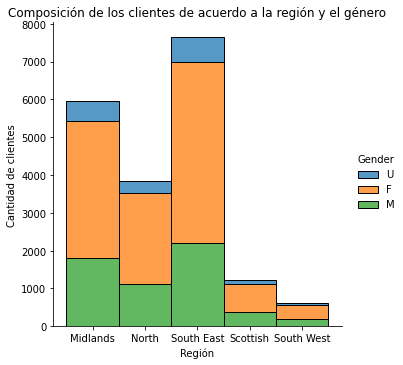

In [ ]:
# Composición de cada región de acuerdo al genero de los clientes
sns.displot(data=df_organics, x="geographic_region", hue="Gender", multiple="stack")
plt.title('Composición de los clientes de acuerdo a la región y el género')
plt.xlabel('Región')
plt.ylabel('Cantidad de clientes')
plt.show()


*   En todas las regiones, es clara la evidencia de que la cartera de clientes  está compuesta por mujeres principalmente.


---

*Análisis sobre la **distribución del gasto** de los clientes*



> **Afiliación**




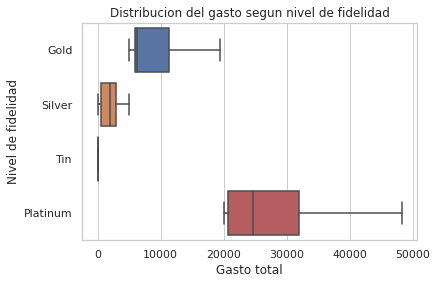

In [ ]:
# Distribución del gasto segun el nivel de fidelidad de los clientes
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="total_spend", y="loyalty_status", data=df_organics, showfliers=False)
plt.title('Distribucion del gasto segun nivel de fidelidad')
plt.xlabel('Gasto total')
plt.ylabel('Nivel de fidelidad')
plt.show()

*   La tienda entregó descuentos para compra la de productos orgánicos a sus clientes del programa de fidelización. 
*   El efecto de esta medida se ve reflejado en el gráfico puesto que quienes compraron orgánicos (1) siempre gastaron menos dinero que los que no (0).
* No todos los clientes de programa de fidelidad consumieron productos orgánicos a pesar de los descuentos ofrecidos.
* Los clientes 'Platinum' son quienes evidencian un mayor gasto, con una media de alrededor de 25.000 libras esterlinas y alcanzando en algunos casos las 50.000 libras esterlinas . Esto podría estar influenciado por el hecho de que, *a mayor grado de fidelidad, mayores son los beneficios otorgados a los clientes, mayores los incentivos a comprar en esas tiendas*.
* El gasto de los clientes 'Gold' y 'Silver' es visiblemente menor y mucho menos variable, especialmente en el caso de 'Gold', que la mediana está casi en el borde inferior del boxplot. En el caso de 'Silver', la mediana se encuentra más o menos en la mitad del boxplot, lo que da una idea de una distribución un tanto más pareja del gasto de esos clientes


>**Género**
 



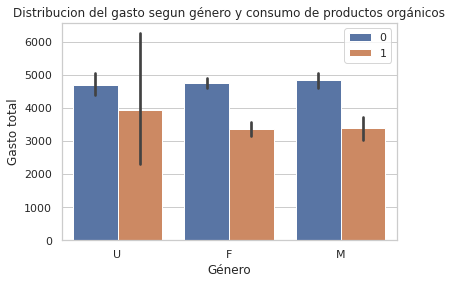

In [ ]:
# Distribucion del gasto de acuerdo al genero, discriminado segun si se compra organicos o no (1-0)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Gender", y="total_spend",hue='organic_purch_indic', data=df_organics)
ax.legend()
plt.title('Distribucion del gasto segun género y consumo de productos orgánicos')
plt.xlabel('Género')
plt.ylabel('Gasto total')
plt.show()

*  No hay una clara diferencia entre el comportamiento de los hombres y las mujeres en cuanto al consumo de productos orgánicos.



---
 **Feature Selection:**


In [ ]:
# Tratamiento de missings

df_organics.loc[df_organics['Gender'].isnull(), "Gender"] = "U"
df_organics.loc[df_organics['geographic_region'].isnull(), "geographic_region"] = "U"
df_organics.loc[df_organics['Neigh_clust_55_lvl'].isnull(), "Neigh_clust_55_lvl"] = 0
df_organics.loc[df_organics['Neigh_clust_7_lvl'].isnull(), "Neigh_clust_7_lvl"] = "U"
df_organics.loc[df_organics['tv_region'].isnull(), "tv_region"] = "U"
df_organics['Age'] = df_organics['Age'].replace(['.'],'0')

df_organics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cust_loy_id              22223 non-null  int64  
 1   Gender                   22223 non-null  object 
 2   geographic_region        22223 non-null  object 
 3   loyalty_status           22223 non-null  object 
 4   Neigh_clust_55_lvl       22223 non-null  float64
 5   Neigh_clust_7_lvl        22223 non-null  object 
 6   tv_region                22223 non-null  object 
 7   Affluence Grade          22223 non-null  object 
 8   Age                      22223 non-null  object 
 9   Frequency                22223 non-null  int64  
 10  Frequency Percent        22223 non-null  object 
 11  Loyalty Card Tenure      22223 non-null  object 
 12  Organics Purchase Count  22223 non-null  int64  
 13  organic_purch_indic      22223 non-null  int64  
 14  total_spend           

In [ ]:
# Eliminamos variables que son irrelevantes para el análisis, ya sea por su contenido o porque están duplicadas

df_organics_clean= df_organics.drop(columns=['Frequency','Frequency Percent','Affluence Grade'])
#df_organics_clean

In [ ]:
# Aplico la técnica de Label Encoder para transformar en numéricas las variables categóricas

df_col=list(df_organics_clean.columns)

for i in range(len(df_col)):
  df_organics_clean[df_col[i]] = LabelEncoder().fit_transform(df_organics_clean[df_col[i]])

df_organics_clean

,cust_loy_id,Gender,geographic_region,loyalty_status,Neigh_clust_55_lvl,Neigh_clust_7_lvl,tv_region,Age,Loyalty Card Tenure,Organics Purchase Count,organic_purch_indic,total_spend
0,0,2,0,0,16,2,12,59,34,0,0,1813
1,1,2,0,0,35,3,12,32,35,0,0,1138
2,2,0,0,2,27,3,12,53,38,1,1,1
3,3,1,0,3,51,5,4,48,37,1,1,0
4,4,0,0,3,4,0,4,51,38,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22218,22218,0,3,2,9,1,3,48,35,0,0,426
22219,22219,2,3,0,34,3,8,56,5,0,0,1162
22220,22220,0,1,0,15,1,13,53,35,0,0,1138
22221,22221,0,1,2,8,1,7,49,35,0,0,1000


>Estandarizo la información de la tabla para luego aplicar **PCA** y generar el dendrograma más cómodamente





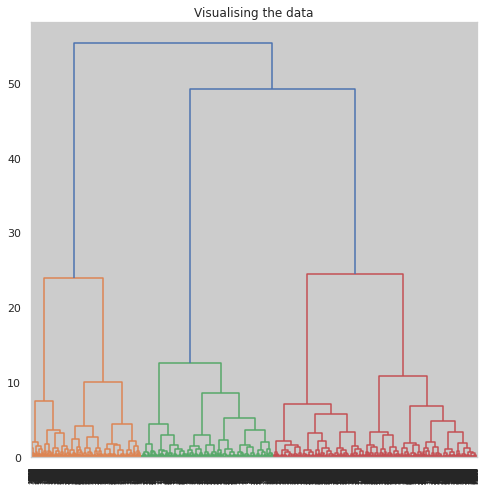

In [ ]:
# 'Escalo' la información para que todas las variables sean comparables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_organics_clean)
 
# Normalizo la data para que siga una distribución Gaussiana

x_normalized = normalize(df_scaled)
 
# Convierto el array de numpy en un  dataframe de pandas
df_normalized = pd.DataFrame(x_normalized)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(X_principal)
df_principal.columns = ['P1', 'P2']

#divido la muestra en train y test
X_train, X_test = train_test_split(df_principal, test_size=0.5, random_state=42)


# Genero el dendrograma
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_train, method ='ward')))

El dendrograma da la idea de que el número ideal de clusters debiera ser 3


---


**Análisis No-Supervisado:**

> **Elección del modelo**

Se opta por el análisis no-supervisado puesto que aquí se carece de variable objetivo. Lo que se quiere hacer es tratar de encontrar patrones en la información que permitan clasificar de algun modo a los clientes de la base de datos.

> En entregas previas del proyecto, se analizó la posibilidad de usar 2 algoritmos de clasificación: **Agglommerative clustering** y **K-Means**. 

Tanto el Agglomerative Clustering como el K-Means tienen sus *pros* y sus *contras*:

* El **Agglomerative Clustering** genera una división más 'ordenada' de la base, sin embargo, será solamente útil para clasificar a los clientes existentes dentro de la base pues, cuando se requiera evaluar nuevos clientes, se deberá correr el algoritmo nuevamente para volver a generar las aglomeraciones.

* Por otro lado, el **K-Means** muestra una segmentación menos evidente de los clientes. A pesar de ello, el modelo será útil para clasificar nuevos clientes que no estén en la base puesto que los centroides o 'puntos neurálgicos' ya están definidos, y solo resta ubicar los nuevos registros de acuerdo a dichos puntos.






> Dadas las particularidades de cada uno, se optó por avanzar con el **K-Means** . Los resultados del Agglomerative Clustering se han omitido para que el documento no sea tan extenso.













**Entrenamiento del modelo** 






>Aplico la técnica del codo para ver cual es el k ideal

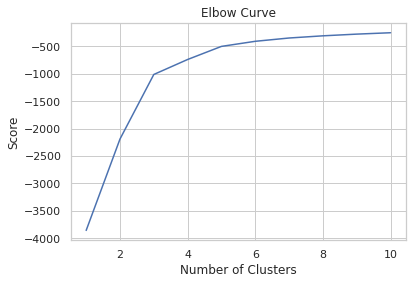

In [ ]:

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



*   De acuerdo a la gráfica del codo, el k ideal  para ejecutar el algoritmo de K-Means parece estar entre 3 y 5





---


*   *K=5* 






In [ ]:
#Hago una copia de mi tabla original luego de aplicar PCA

X_train5=X_train
#Ejecuto el algoritmo de K-Means para k=5 

kmeans5 = KMeans(n_clusters=5).fit(X_train5) #mi X
centroids = kmeans5.cluster_centers_
print(centroids)

# Predicting the clusters
labels5 = kmeans5.predict(X_train5) #mi Y



[[ 0.1357197  -0.19097868]
 [-0.55702284  0.4935299 ]
 [ 0.60425001  0.02581878]
 [-0.38012967 -0.37406371]
 [ 0.07916009  0.67847134]]


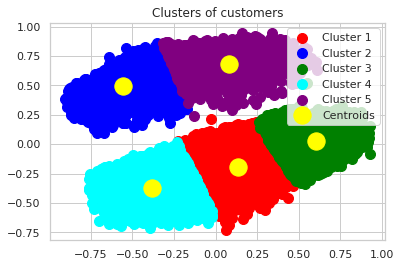

In [ ]:
#Agrego mi Y a la tabla principal
X_train5['pred']=labels5

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
X_train5_scatter=X_train5.values

#Genero el scatter para ver cómo quedaron armados los clusters
plt.scatter(X_train5_scatter[labels5 == 0, 0], X_train5_scatter[labels5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train5_scatter[labels5 == 1, 0], X_train5_scatter[labels5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train5_scatter[labels5 == 2, 0], X_train5_scatter[labels5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train5_scatter[labels5 == 3, 0], X_train5_scatter[labels5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_train5_scatter[labels5 == 4, 0], X_train5_scatter[labels5 == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')

plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()




---



*   *K=4*


In [ ]:
#Hago una copia de mi tabla original luego de aplicar PCA

X_train4=X_train


#Ejecuto el algoritmo de K-Means para k=4 y obtengo los centroides

kmeans4 = KMeans(n_clusters=4).fit(X_train4) #mi X
centroids = kmeans4.cluster_centers_
print(centroids)

# Predicting the clusters
labels4 = kmeans4.predict(X_train4) #mi Y

[[ 6.03219995e-01  2.56890156e-02  2.00000000e+00]
 [ 1.35024043e-01 -1.91613948e-01  1.88737914e-14]
 [-5.57022837e-01  4.93529900e-01  1.00000000e+00]
 [-2.56272311e-01 -9.02250029e-02  3.26967150e+00]]


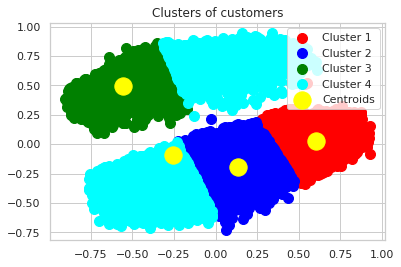

In [ ]:
#Agrego mi Y a la tabla principal
X_train4['pred']=labels4

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
X_train4_scatter=X_train4.values

plt.scatter(X_train4_scatter[labels4 == 0, 0], X_train4_scatter[labels4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train4_scatter[labels4 == 1, 0], X_train4_scatter[labels4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train4_scatter[labels4 == 2, 0], X_train4_scatter[labels4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train4_scatter[labels4 == 3, 0], X_train4_scatter[labels4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.legend()
plt.show()




---



*   *K=3*



In [ ]:
#Hago una copia de mi tabla original luego de aplicar PCA


X_train3=X_train


#Ejecuto el algoritmo de K-Means para k=3 y obtengo los centroides

kmeans3 = KMeans(n_clusters=3).fit(X_train3) #mi X
centroids = kmeans3.cluster_centers_
print(centroids)

# Predicting the clusters
labels3 = kmeans3.predict(X_train3) #mi Y

[[ 0.35725491 -0.08847033  0.52534646]
 [-0.31290054  0.56463486  2.38361131]
 [-0.380042   -0.37385001  3.        ]]


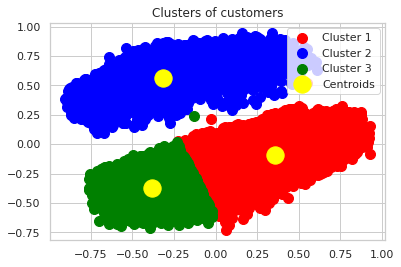

In [ ]:
#Agrego mi Y a la tabla principal
X_train3['pred']=labels3

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
X_train3_scatter=X_train3.values

plt.scatter(X_train3_scatter[labels3 == 0, 0], X_train3_scatter[labels3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train3_scatter[labels3 == 1, 0], X_train3_scatter[labels3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train3_scatter[labels3 == 2, 0], X_train3_scatter[labels3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.legend()
plt.show()



In [ ]:
# DB index para K=5
print(davies_bouldin_score(X_train5, labels5))

0.6058684975023584


In [ ]:
# DB index para K=4
print(davies_bouldin_score(X_train4, labels4))

0.7854591749543502


In [ ]:
# DB index para K=3
print(davies_bouldin_score(X_train3, labels3))

0.445825329420735




---



> Inicialmente, el método del codo indicaba como k ideal un valor entre 3 y 5. Si observamos la gráfica de cada cluster,  vemos que esto se cumple ya que al elegir tanto k=3 como k=5, las observaciones se ubican más ordenadamente alrededor de los centroides. Sumado a esto, si se utiliza el **DB Index** para entender cuál es el k más apropiado, se puede confirmar que k=3 sigue siendo la mejor opción, puesto que posee el menor DB index.



**Evaluación del modelo**

Repito el proceso anterior pero utilizando nuestra muestra reservada para el testeo

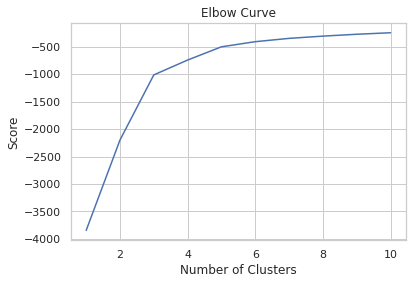

In [ ]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_test).score(X_test) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

*   K=5



In [ ]:
#Hago una copia de mi tabla original luego de aplicar PCA

X_test5=X_test
#Ejecuto el algoritmo de K-Means para k=5 

kmeans5 = KMeans(n_clusters=5).fit(X_test5) #mi X
centroids = kmeans5.cluster_centers_
print(centroids)

# Predicting the clusters
labels5 = kmeans5.predict(X_test5) #mi Y

[[ 0.13070751 -0.19364911]
 [-0.37742445 -0.36854838]
 [-0.56732466  0.48678582]
 [ 0.05495887  0.68658834]
 [ 0.60448107  0.02631771]]


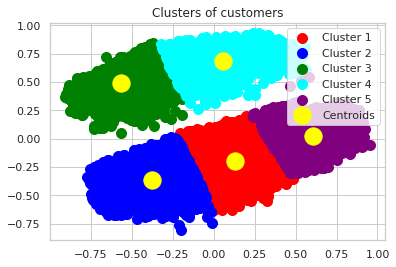

In [ ]:
#Agrego mi Y a la tabla principal
X_test5['pred']=labels5

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
X_test5_scatter=X_test5.values

#Genero el scatter para ver cómo quedaron armados los clusters
plt.scatter(X_test5_scatter[labels5 == 0, 0], X_test5_scatter[labels5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test5_scatter[labels5 == 1, 0], X_test5_scatter[labels5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test5_scatter[labels5 == 2, 0], X_test5_scatter[labels5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test5_scatter[labels5 == 3, 0], X_test5_scatter[labels5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test5_scatter[labels5 == 4, 0], X_test5_scatter[labels5 == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')

plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()



*   K=4



In [ ]:
#Hago una copia de mi tabla original luego de aplicar PCA

X_test4=X_test


#Ejecuto el algoritmo de K-Means para k=4 y obtengo los centroides

kmeans4 = KMeans(n_clusters=4).fit(X_test4) #mi X
centroids = kmeans4.cluster_centers_
print(centroids)

# Predicting the clusters
labels4 = kmeans4.predict(X_test4) #mi Y

[[-3.19546799e-01  5.66342223e-01  2.39598540e+00]
 [ 1.30791814e-01 -1.93611946e-01  2.22044605e-16]
 [ 6.04481068e-01  2.63177064e-02  4.00000000e+00]
 [-3.77332959e-01 -3.68525246e-01  1.00000000e+00]]


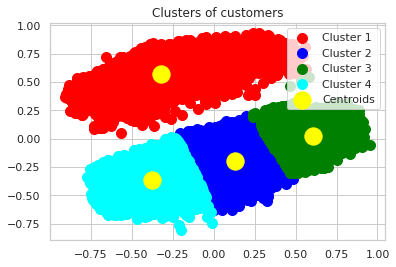

In [ ]:
#Agrego mi Y a la tabla principal
X_test4['pred']=labels4

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
X_test4_scatter=X_test4.values

plt.scatter(X_test4_scatter[labels4 == 0, 0], X_test4_scatter[labels4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test4_scatter[labels4 == 1, 0], X_test4_scatter[labels4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test4_scatter[labels4 == 2, 0], X_test4_scatter[labels4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test4_scatter[labels4 == 3, 0], X_test4_scatter[labels4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')


plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.legend()
plt.show()




*   K=3



In [ ]:
#Hago una copia de mi tabla original luego de aplicar PCA
X_test3=X_test

#Ejecuto el algoritmo de K-Means para k=3 y obtengo los centroides

kmeans3 = KMeans(n_clusters=3).fit(X_test3) #mi X
centroids = kmeans3.cluster_centers_
print(centroids)

# Predicting the clusters
labels3 = kmeans3.predict(X_test3) #mi Y

[[ 3.53037606e-01 -9.04252273e-02  1.46918057e+00]
 [-3.77332959e-01 -3.68525246e-01  3.00000000e+00]
 [-3.19546799e-01  5.66342223e-01  3.57491814e-14]]


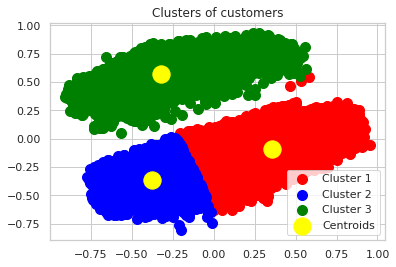

In [ ]:
#Agrego mi Y a la tabla principal
X_test3['pred']=labels3

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
X_test3_scatter=X_test3.values

plt.scatter(X_test3_scatter[labels3 == 0, 0], X_test3_scatter[labels3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test3_scatter[labels3 == 1, 0], X_test3_scatter[labels3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test3_scatter[labels3 == 2, 0], X_test3_scatter[labels3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.legend()
plt.show()


In [ ]:
# DB index para K=5
print(davies_bouldin_score(X_test5, labels5))

0.6148811540355201


In [ ]:
# DB index para K=4
print(davies_bouldin_score(X_test4, labels4))

0.5573466831029119


In [ ]:
# DB index para K=3
print(davies_bouldin_score(X_test3, labels3))

0.3952323693156528


Sorpresivamente, al evaluar el modelo con la muestra de test, los puntos se agrupan de manera mucho más ordenada alrededor de los centroides, ya sea que lo evaluemos para k=3, 4 o 5. A priori, si solo nos basamos en las gráficas, sería difícil determinar cual es el mejor K para el modelo, puesto que en todos los casos, los puntos quedan bien agrupados alrededor de los K's. Por esto, se recurre nuevamente a las métricas de evaluación, en este caso el DB Index, y se confirma el resultado obtenido en la etapa de entrenamiento: el K ideal sigue siendo **3**



---


Luego de evaluar el modelo **se decide avanzar con K=3**. Se aplicará entonces el K-means a la base completa para luego generar insights y continuar con el desarrollo del trabajo.

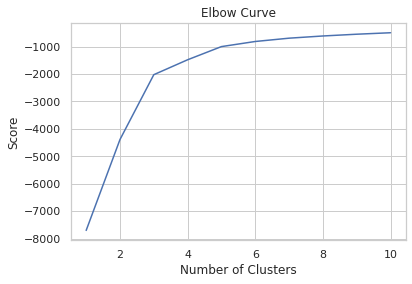

In [ ]:
#Utilizo la tabla original, luego de hacerle PCA (df_principal)

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df_principal).score(df_principal) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



*   Con la técnica del codo se confirma que el K elegido (3) se encuentra entre los valores ideales.


[[-0.26202404 -0.33485587]
 [ 0.46485426 -0.01734009]
 [-0.352358    0.56057844]]


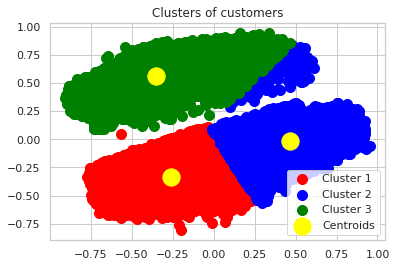

In [ ]:
#Ejecuto el algoritmo de K-Means para k=3 y obtengo los centroides

kmeans3 = KMeans(n_clusters=3).fit(df_principal) #mi X
centroids = kmeans3.cluster_centers_
print(centroids)

# Predicting the clusters
labels3 = kmeans3.predict(df_principal) #mi Y

#Agrego mi Y a la tabla principal
df_principal['cluster']=labels3

#Necesito convertir mi dataframe a un numpy array para luego poder graficar
df_principal_scatter=df_principal.values

plt.scatter(df_principal_scatter[labels3 == 0, 0], df_principal_scatter[labels3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_principal_scatter[labels3 == 1, 0], df_principal_scatter[labels3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_principal_scatter[labels3 == 2, 0], df_principal_scatter[labels3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.legend()
plt.show()

In [ ]:
# DB index
print(davies_bouldin_score(df_principal, labels3))

0.40472161507687304




Utilizo el score de **Davies Bouldin** para evaluar la calidad del algoritmo elegido. 

*   El DB Index se define como la **medida de similitud promedio de cada grupo con su grupo más similar**. La **similitud** es la **relación entre las distancias dentro de un grupo y las distancias entre grupos**. De esta forma, los clusters que estén más alejados y menos dispersos darán una mejor puntuación.

*  El DB Index obtenido en esta iteración está alineado con los calculados en la etapa de train y test.



---





> **Análisis intra-cluster**

In [ ]:
#Añado el resultado de la predicción a mi tabla original (df_organics) para analizar los clusters y conocer sus caracteristicas

df_organics_final=pd.merge(df_organics, df_principal,left_index=True, right_index=True)

df_organics_final= df_organics_final.drop(columns=['P1','P2'])
df_organics_final


,cust_loy_id,Gender,geographic_region,loyalty_status,Neigh_clust_55_lvl,Neigh_clust_7_lvl,tv_region,Affluence Grade,Age,Frequency,Frequency Percent,Loyalty Card Tenure,Organics Purchase Count,organic_purch_indic,total_spend,cluster
0,140,U,Midlands,Gold,16.0,C,Wales & West,10,76,1,0.00%,4,0,0,16000.00,1
1,620,U,Midlands,Gold,35.0,D,Wales & West,4,49,1,0.00%,5,0,0,6000.00,1
2,868,F,Midlands,Silver,27.0,D,Wales & West,5,70,1,0.00%,8,1,1,0.02,2
3,1120,M,Midlands,Tin,51.0,F,Midlands,10,65,1,0.00%,7,1,1,0.01,2
4,2313,F,Midlands,Tin,4.0,A,Midlands,11,68,1,0.00%,8,0,0,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,F,South East,Silver,9.0,B,London,13,65,1,0.00%,5,0,0,1500.00,1
22219,52834376,U,South East,Gold,34.0,D,S & S East,15,73,1,0.00%,12,0,0,6053.06,1
22220,52837057,F,North,Gold,15.0,B,Yorkshire,9,70,1,0.00%,5,0,0,6000.00,1
22221,52838096,F,North,Silver,8.0,B,N West,11,66,1,0.00%,5,0,0,5000.00,1


In [ ]:
#Parto la tabla final en 3 para analizar los resultados de cada cluster
df_organics_final_cluster0=df_organics_final[df_organics_final['cluster']==0]

df_organics_final_cluster1=df_organics_final[df_organics_final['cluster']==1]

df_organics_final_cluster2=df_organics_final[df_organics_final['cluster']==2]



---



*   **CLUSTER A**




>   **Afiliación:**






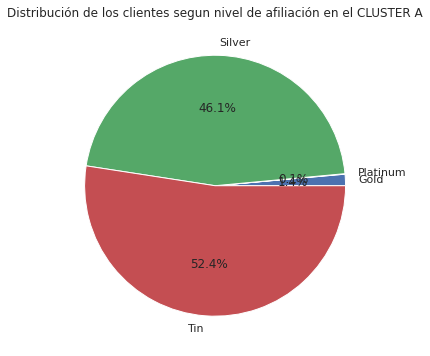

In [ ]:
df_organics_final_cluster0_loyalty=df_organics_final_cluster0[['cust_loy_id','loyalty_status']].groupby(by='loyalty_status').count()

plt.figure(figsize=(10,6))
plt.pie(df_organics_final_cluster0_loyalty.cust_loy_id, labels = df_organics_final_cluster0_loyalty.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación en el CLUSTER A')
plt.show()



*   Cartera compuesta prácticamente por miembros Tin y Silver
*   Platinum y Gold no llegan a alcanzar el 1%






> **Género:**


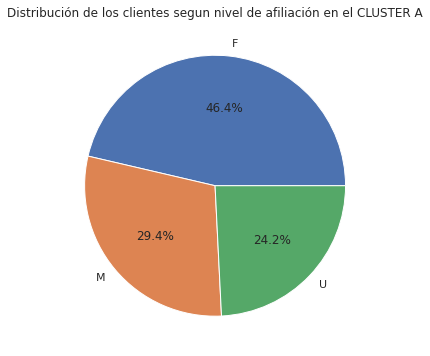

In [ ]:
df_organics_final_cluster0_gender=df_organics_final_cluster0[['cust_loy_id','Gender']].groupby(by='Gender').count()

plt.figure(figsize=(10,6))
plt.pie(df_organics_final_cluster0_gender.cust_loy_id, labels = df_organics_final_cluster0_gender.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación en el CLUSTER A')
plt.show()



*   Aproximadamente, la mitad de la cartera está compuesta por mujeres






*   **Región:**



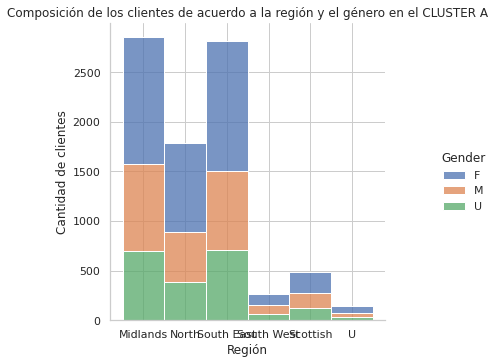

In [ ]:
# Composición de cada región de acuerdo al genero de los clientes
sns.displot(data=df_organics_final_cluster0, x="geographic_region", hue="Gender", multiple="stack")
plt.title('Composición de los clientes de acuerdo a la región y el género en el CLUSTER A')
plt.xlabel('Región')
plt.ylabel('Cantidad de clientes')
plt.show()



*   Midlands y South son las regiones con más clientes
*   En todos los casos, el mayor porcentaje de clientes es el femenino





*   **Consumo de orgánicos:**






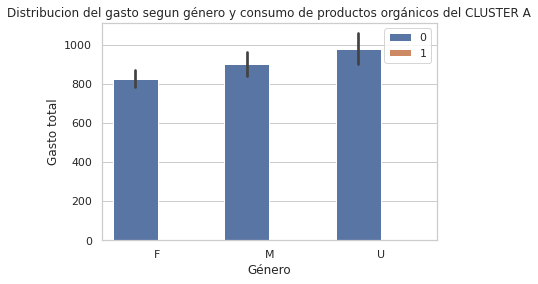

In [ ]:
# Distribucion del gasto de acuerdo al genero, discriminado segun si se compra organicos o no (1-0)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Gender", y="total_spend",hue='organic_purch_indic', data=df_organics_final_cluster0)
ax.legend()
plt.title('Distribucion del gasto segun género y consumo de productos orgánicos del CLUSTER A')
plt.xlabel('Género')
plt.ylabel('Gasto total')
plt.show()



*   Los clientes del CLUSTER A **no consumen** productos orgánicos




---



*   **CLUSTER B** 


>   **Afiliación:**


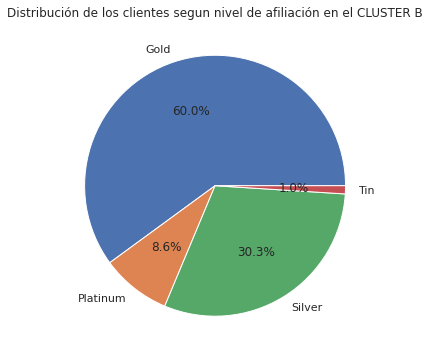

In [ ]:
df_organics_final_cluster1_loyalty=df_organics_final_cluster1[['cust_loy_id','loyalty_status']].groupby(by='loyalty_status').count()

plt.figure(figsize=(10,6))
plt.pie(df_organics_final_cluster1_loyalty.cust_loy_id, labels = df_organics_final_cluster1_loyalty.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación en el CLUSTER B')
plt.show()



*   Gold agrupa clientes de más de la mitad de la cartera
*   Silver lo sigue, con casi 1/3 del total
*   Platinum y Tin representan menos del 10%



> **Género:**

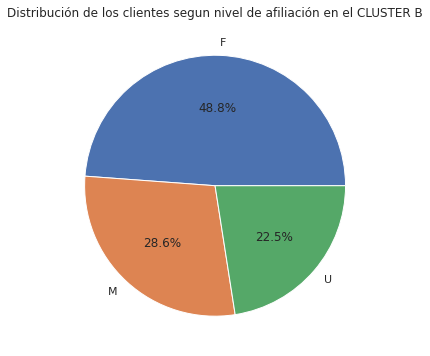

In [ ]:
df_organics_final_cluster1_gender=df_organics_final_cluster1[['cust_loy_id','Gender']].groupby(by='Gender').count()

plt.figure(figsize=(10,6))
plt.pie(df_organics_final_cluster1_gender.cust_loy_id, labels = df_organics_final_cluster1_gender.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación en el CLUSTER B')
plt.show()



*   Un poco menos de la mitad de la cartera está conformada por mujeres
*   El porcentaje de hombres representa prácticamente un tercio del total



*   **Región:**


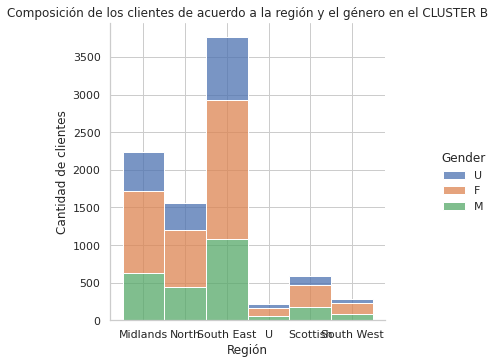

In [ ]:
# Composición de cada región de acuerdo al genero de los clientes
sns.displot(data=df_organics_final_cluster1, x="geographic_region", hue="Gender", multiple="stack")
plt.title('Composición de los clientes de acuerdo a la región y el género en el CLUSTER B')
plt.xlabel('Región')
plt.ylabel('Cantidad de clientes')
plt.show()



*   South es la región con más clientes
*   En todas las regiones el porcentaje de mujeres siempre es el mayor





*   **Consumo de orgánicos:**

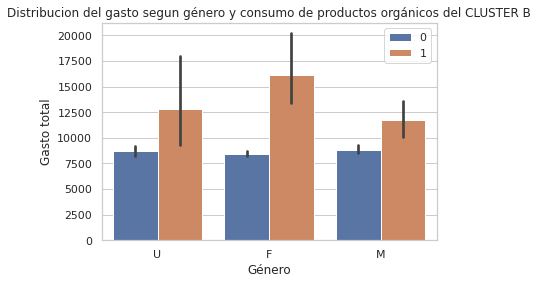

In [ ]:
# Distribucion del gasto de acuerdo al genero, discriminado segun si se compra organicos o no (1-0)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Gender", y="total_spend",hue='organic_purch_indic', data=df_organics_final_cluster1)
ax.legend()
plt.title('Distribucion del gasto segun género y consumo de productos orgánicos del CLUSTER B')
plt.xlabel('Género')
plt.ylabel('Gasto total')
plt.show()



*   Los clientes del CLUSTER B que consumen productos orgánicos, siempre hacen un mayor gasto que los que no los consumen
*   Las mujeres son quienes más dinero gastan al consumir orgánicos




---



*   **CLUSTER C** 


>   **Afiliación:**


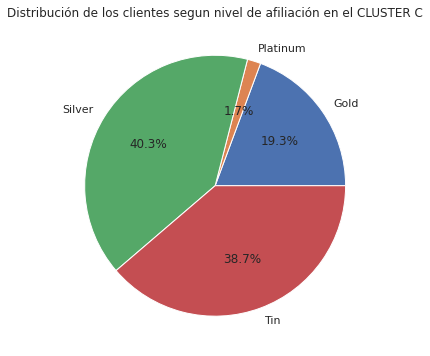

In [ ]:
df_organics_final_cluster2_loyalty=df_organics_final_cluster2[['cust_loy_id','loyalty_status']].groupby(by='loyalty_status').count()

plt.figure(figsize=(10,6))
plt.pie(df_organics_final_cluster2_loyalty.cust_loy_id, labels = df_organics_final_cluster2_loyalty.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación en el CLUSTER C')
plt.show()



*   El total de clientes se encuentra repartido de forma más balanceada entre Silver, Tin y Gold que en el resto de clusters
*   El CLUSTER C posee el mayor porcentaje de clientes Platinum de entre todos los clusters



> **Género:**

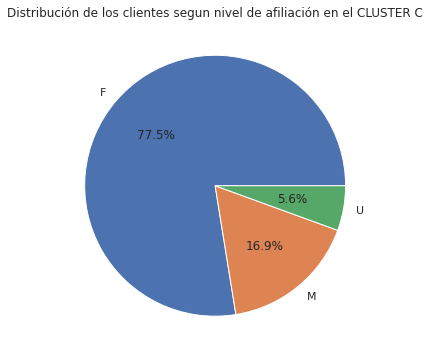

In [ ]:
df_organics_final_cluster2_gender=df_organics_final_cluster2[['cust_loy_id','Gender']].groupby(by='Gender').count()

plt.figure(figsize=(10,6))
plt.pie(df_organics_final_cluster2_gender.cust_loy_id, labels = df_organics_final_cluster2_gender.index,autopct='%1.1f%%')
plt.title('Distribución de los clientes segun nivel de afiliación en el CLUSTER C')
plt.show()



*   Más del 75% del cluster se encuentra conformado por mujeres
*   Es el cluster con menor presencia masculina



*   **Región:**

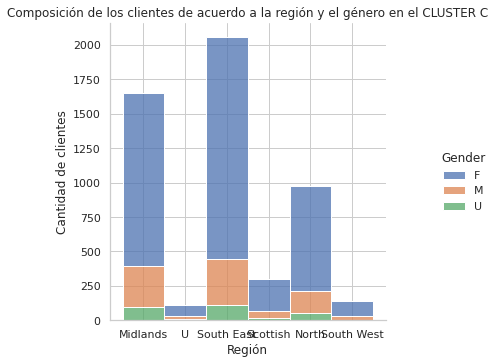

In [ ]:
# Composición de cada región de acuerdo al genero de los clientes
sns.displot(data=df_organics_final_cluster2, x="geographic_region", hue="Gender", multiple="stack")
plt.title('Composición de los clientes de acuerdo a la región y el género en el CLUSTER C')
plt.xlabel('Región')
plt.ylabel('Cantidad de clientes')
plt.show()



*   South y Midlands siguen siendo las regiones con mayor cantidad de clientes





*   **Consumo de orgánicos:**

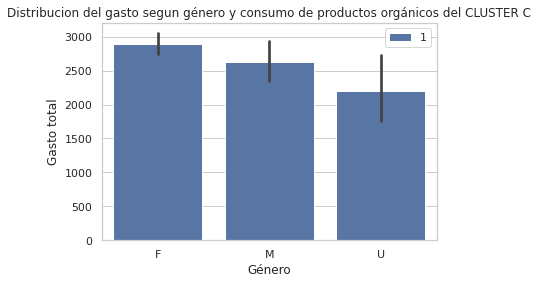

In [ ]:
# Distribucion del gasto de acuerdo al genero, discriminado segun si se compra organicos o no (1-0)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Gender", y="total_spend",hue='organic_purch_indic', data=df_organics_final_cluster2)
ax.legend()
plt.title('Distribucion del gasto segun género y consumo de productos orgánicos del CLUSTER C')
plt.xlabel('Género')
plt.ylabel('Gasto total')
plt.show()



*   **Todos** los clientes del CLUSTER C consumen productos orgánicos




**Next steps**


*   Elaborar un modelo supervisado de clasificacion (KNN o regresión logística multinomial) para luego poder clasificar nuevos datos

*  Aplicar cross validation
